In [1]:
# Deprocations of jupyter warnings about sns functions that will be deprocated in the future. (sns.distplot)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading a CSV file into pandas Dataframe
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import seaborn as sns
# Removing missing values
missing_values = ["n/a", "na", "--","?"]
df = pd.read_csv("C:\\Users\\רוני\\OneDrive‏ - Technion\\Documents\\סמסטר ה\\סטטיסטיקה 2\\משימת פרויקט 1\\adult.csv",sep=",", na_values = missing_values)
df=df.dropna()
# Converting string columns to binary.
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
df['income'] = df['income'].map({'>50K': 1, '<=50K': 0})
# Reducing dataset size to 4000 samples.
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,1,0,0,30,United-States,0


# Estimation:
### Our question is:

#### Is the one who earns more (>50K) necessarily in the different age category from the one who earns less (<=50)?
#### X- age Y-income

#### 1a.Calculation of Mean of educational_num per each category of an income.  

In [3]:
# MLE of the expected value of 'age' according to categories in 'income' 
EV_MLE_0=df.groupby('income')['age'].mean()[0]
EV_MLE_1=df.groupby('income')['age'].mean()[1]

z=1.96

# SE of the expected value of 'age' according to categories in 'income'
df_category0 = df[df['income'] ==0]['age']
SE_0=df_category0.sem()
df_category1 = df[df['income'] ==1]['age']
SE_1=df_category1.sem()
print(df.groupby('income')['age'].describe()[['count','mean','std']])
print("-"*100)

          count       mean        std
income                               
0       34014.0  36.749427  13.564683
1       11208.0  44.006067  10.340502
----------------------------------------------------------------------------------------------------


#### b+c.Calculation on CI per each category of an income

Confidence interval of expected val. age for income =< 50K: 0.29
[36.61,36.89]
Confidence interval of expected val. age for income > 50K: 0.38
[43.81,44.20]
----------------------------------------------------------------------------------------------------


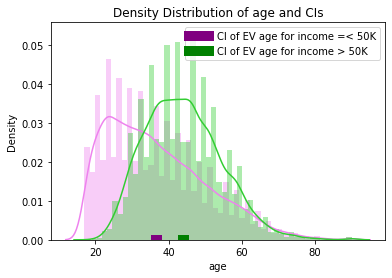

In [4]:
#Calc CIs of expected value of age by income category
lower_bound_0=EV_MLE_0-z*SE_0
upper_bound_0=EV_MLE_0+z*SE_0
conf_int_0=upper_bound_0-lower_bound_0

lower_bound_1=EV_MLE_1-z*SE_1
upper_bound_1=EV_MLE_1+z*SE_1
conf_int_1=upper_bound_1-lower_bound_1

print("Confidence interval of expected val. age for income =< 50K: {:.2f}".format(conf_int_0))
print("[{:.2f},{:.2f}]".format(lower_bound_0,upper_bound_0))

print("Confidence interval of expected val. age for income > 50K: {:.2f}".format(conf_int_1))
print("[{:.2f},{:.2f}]".format(lower_bound_1,upper_bound_1))
print("-"*100)

fig, ax = plt.subplots()
# Plot CIs and density distribution of age
sns.distplot(df[df['income'] ==0]['age'],kde=True, color='violet')
sns.distplot(df[df['income'] ==1]['age'],kde=True, color='limegreen')
ci_0, = ax.plot((lower_bound_0,upper_bound_0),(0,0), label="CI of EV age for income =< 50K",linewidth=10,color='purple')
ci_1, = ax.plot((lower_bound_1,upper_bound_1),(0,0), label="CI of EV age for income > 50K", linewidth=10,color='green')
first_legend = ax.legend(handles=[ci_0,ci_1], loc='upper right')
plt.title('Density Distribution of age and CIs')
plt.show()

#### Confidence Intervals of two categories don't overlap. Hence,  we can conclude that the difference is significant.(at the 0.05 level of significance)

## Hypothesis testing

#### a. Formulation of the null hypothesis and the alternative.

H_0: There is no relationship between age and income: EV_MLE_0=EV_MLE_1

H_1: There is a relationship between age and income: EV_MLE_0!=EV_MLE_1

#### b. Are the assumptions of the T test met? A quality test can be performed qualitatively with help of a histogram.


Two-sample t-test assumptions to conduct a valid test:

    1.Data values must be independent.
    
    2.Data in each group must be obtained via a random sample from the population.
    
    3.Data in each group are normally distributed.
    
    4.Data values are continuous.
    
    5.The variances for the two independent groups are equal.
    
##### The assumptions of the T test are not met. The destribution of the age for category income <=50K is not approximately normal, more like A chi-square.



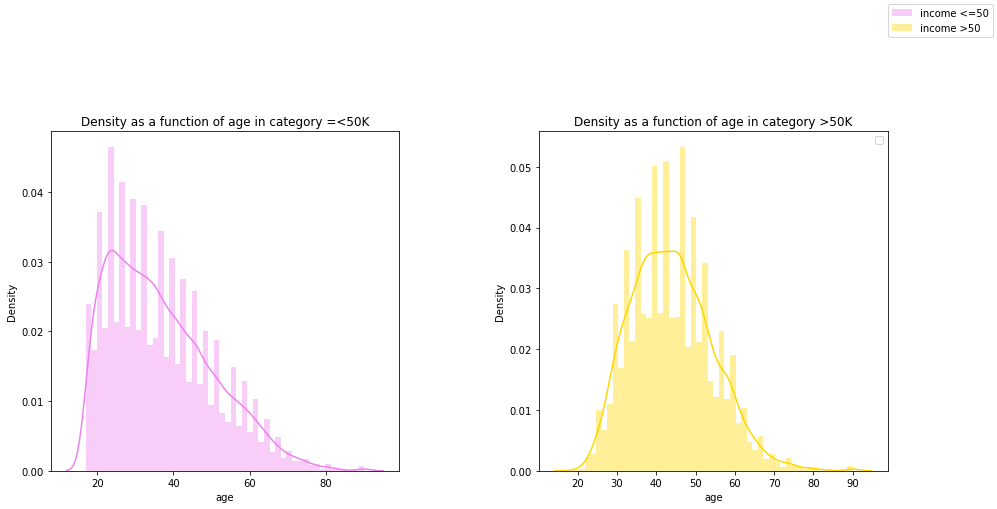

              std
income           
0       13.564683
1       10.340502


In [5]:
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
plt.title('Density as a function of age in category =<50K')
sns.distplot(df[df['income'] ==0]['age'],kde=True, color='violet',label='income <=50')
ax = fig.add_subplot(2, 2, 2)
sns.distplot(df[df['income'] ==1]['age'],kde=True, color='gold',label='income >50')
first_legend = ax.legend(handles=[], loc='upper right')
plt.title('Density as a function of age in category >50K')
fig.legend()
plt.show()
print(df.groupby('income')['age'].describe()[['std']])

#### As we can see, the data does not distributed normally. Therefore, the assumptions of the T test are not met. 

#### c. Test the hypothesis using a T test. If the assumptions do not hold, explain whether there is meaning of the results obtained.

 T= $(\hat{\mu_1}-\hat{\mu_0}) / ({s_p}*\sqrt{({1/n_1}+{1/n_2})})$  ${s_p^2}=(({n_1-1}){s_1^2}+({n_2-1}){s_2^2})/({n_1+n_2-2})$



In [6]:
import math
from scipy import stats
n0=df.groupby('income')['age'].count()[0]
n1=df.groupby('income')['age'].count()[1]
std0=df.groupby('income')['age'].std()[0]
std1=df.groupby('income')['age'].std()[1]
sp=math.sqrt((((n0-1)*(std0**2))+((n1-1)*(std1**2)))/(n0+n1-2))

T=(EV_MLE_1-EV_MLE_0)/(sp*(math.sqrt((1/n1+1/n0))))

t_crit = stats.t.ppf(q=0.95, df=n0+n1-2)
print (T)
print(t_crit)

51.88533410790005
1.6448873244427278


We compare the value of our statistic to the t value. Since value of our statistic > t value, we reject the null hypothesis.(This conclusion also obvious from looking at the CI of the categories).
But, because the data does not distributed normally, the test is meanningless.



#### d. Test the hypothesis using the Wald test.
W= $|\hat{\theta}-{\theta_{0}}|/({\hat{se}}) $

W= $(\hat{\mu_1}-\hat{\mu_0}-0)/(\sqrt{(\hat{se_{1}^2}+\hat{se_{0}^2}}) $

In [7]:
W= (EV_MLE_1-EV_MLE_0)/math.sqrt(SE_0**2+SE_1**2)
print(abs(W))

59.34980443976972


$ {|W|}>{z_{0.05/2}} {\rightarrow}$ We reject the null hypothesis.

#### e. Compare the results and the values of the p-values.

We rejected the null hypothesis using T test and also by using Wald test.

P values: 
Wald test: ${P(|Z|>|z|)}=1-[{P(Z<|z|)}-{P(Z<-|z|)}]=0$

```{toggle} T test: ${P(|T|>|t|)}=1-[{P(T<|t|)}-{P(T<-|t|)}]=0$



In [8]:
from scipy.stats import norm,t

#T test P_value
p_val_t=1-(t.cdf(abs(T), df=n0+n1-2)-stats.t.cdf(-abs(T), df=n0+n1-2))

#Wald test P_value
p_val_w=1-(norm.cdf(abs(W))-norm.cdf(-abs(W)))

print("T test P_value {:.20}".format(p_val_t))
print("Wald test P_value {:.20f}".format(p_val_w))

T test P_value 0.0
Wald test P_value 0.00000000000000000000


#### f.
We assume normal distribution as asked in the question even though our data distribute chi-square for category income <= 50K and bell shaped (not normal because it only contains positive values) for category > 50K.
(we tried different categories in this dataset. They distribute like mixture of gaussians, or has a bell shape but with positive values. The option represented is the closest.)

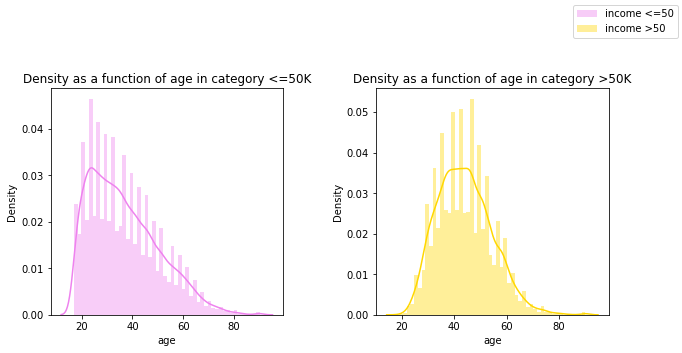

In [9]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 2, 1)
sns.distplot(df[df['income'] ==0]['age'],kde=True, color='violet',label='income <=50')
plt.title('Density as a function of age in category <=50K')

ax = fig.add_subplot(2, 2, 2)
sns.distplot(df[df['income'] ==1]['age'],kde=True, color='gold',label='income >50')
plt.title('Density as a function of age in category >50K')

fig.legend()
plt.show()


MLE assimptotically has normal distribution, hence EV_MLE_0-EV_MLE_1 also assimptotically has normal distribution.
While: $\hat{\theta_{n}}={\mu}$, $\hat{\theta_{0,n}}=0 $

${\lambda}=2log({L_{n}(\hat{\theta_{n}})}/{L_{n}(\hat{\theta_{0,n}})})$

${\lambda}=n{\mu^2}/{\sigma^2}$ while MLE $\hat{\mu}=\bar{X_1}-\bar{X_0}, \hat{\sigma^2}={\sigma_0^2}+{\sigma_1^2}$

hence ${\lambda}=n(\bar{X_1}-\bar{X_0})/({\sigma_0^2}+{\sigma_1^2})$
We will reject the null hypothesis if ${\lambda}>{\chi^2_{1,0.05}}$


In [10]:
from scipy.stats import chi2
lambda1=len(df.index)*(EV_MLE_1-EV_MLE_0)/(std0**2+std1**2)
chi_quantile=chi2.ppf(0.05, 1)
if lambda1>chi_quantile:
    print("{} > {}, hence we reject the null hypothesis".format(lambda1,chi_quantile))
else:
    print("{} <= {}, hence we can not reject the null hypothesis".format(lambda1,chi_quantile))

1127.9813171151332 > 0.003932140000019522, hence we reject the null hypothesis


# Different sample sizes

#### A. Randomly select samples in sizes 30,50,100,500 from the original data file.

In [11]:
missing_values = ["n/a", "na", "--","?"]
df1 = pd.read_csv("C:\\Users\\רוני\\OneDrive‏ - Technion\\Documents\\סמסטר ה\\סטטיסטיקה 2\\משימת פרויקט 1\\adult.csv",sep=",", na_values = missing_values)
df1=df1.dropna()
# Converting string columns to binary.
df1['gender'] = df1['gender'].map({'Female': 0, 'Male': 1})
df1['income'] = df1['income'].map({'>50K': 1, '<=50K': 0})
# Sampling data
df30=df1.sample(n = 30)
df50=df1.sample(n = 50)
df100=df1.sample(n = 100)
df500=df1.sample(n = 500)

#### B. The bigger the number of sumples the smaller the CI for each category. It means we are more accurate, the astimation is better for bigger n. 

In [12]:
def get_ci(df):
    """
    this function calcs the ci for a certain data set.
    """

    # MLE of the expected value of 'age' according to categories in 'income' 
    EV_MLE_0=df.groupby('income')['age'].mean()[0]
    EV_MLE_1=df.groupby('income')['age'].mean()[1]
    z=1.96
    # SE of the expected value of 'age' according to categories in 'income'
    df_category0 = df[df['income'] ==0]['age']
    SE_0=df_category0.sem()
    df_category1 = df[df['income'] ==1]['age']
    SE_1=df_category1.sem()
    #Calc CIs of expected value of age by income category
    lower_bound_0=EV_MLE_0-z*SE_0
    upper_bound_0=EV_MLE_0+z*SE_0
    conf_int_0=upper_bound_0-lower_bound_0
    
    lower_bound_1=EV_MLE_1-z*SE_1
    upper_bound_1=EV_MLE_1+z*SE_1
    
    conf_int_1=upper_bound_1-lower_bound_1
    return {'0':[lower_bound_0,upper_bound_0], '1':[lower_bound_1,upper_bound_1]}

In [13]:
for size,df_n in {'30':df30,'50':df50,'100':df100,'500':df500,'4000':df}.items():
    print('Sample size = {}'.format(size))
    print("Confidence interval of expected val. age for income =< 50K: {:.2f}".format(get_ci(df_n)['0'][1]-get_ci(df_n)['0'][0]))
    print("Confidence interval of expected val. age for income > 50K: {:.2f}".format(get_ci(df_n)['1'][1]-get_ci(df_n)['1'][0]))
    print("-"*100)


Sample size = 30
Confidence interval of expected val. age for income =< 50K: 14.34
Confidence interval of expected val. age for income > 50K: 9.83
----------------------------------------------------------------------------------------------------
Sample size = 50
Confidence interval of expected val. age for income =< 50K: 8.50
Confidence interval of expected val. age for income > 50K: 14.86
----------------------------------------------------------------------------------------------------
Sample size = 100
Confidence interval of expected val. age for income =< 50K: 6.45
Confidence interval of expected val. age for income > 50K: 6.95
----------------------------------------------------------------------------------------------------
Sample size = 500
Confidence interval of expected val. age for income =< 50K: 2.80
Confidence interval of expected val. age for income > 50K: 3.21
----------------------------------------------------------------------------------------------------
Sample s

#### C. We rejected the null hypothesis for different samples sizes while perfirming Wald test.
We know, the bigger n the higer the probabilty to reject null hypothesis. Here, we can see that even for small n the null hypotesis can be rejected for a significance level of α = 0.05.
Also,  we cant see that ${P_{value}} {\rightarrow_{n {\rightarrow}{\infty}}} 0$

In [14]:
def wald_test(df):
    """
    this function calcs the wald test on the data
    """
    # MLE of the expected value of 'age' according to categories in 'income' 
    EV_MLE_0=df.groupby('income')['age'].mean()[0]
    EV_MLE_1=df.groupby('income')['age'].mean()[1]

    z=1.96

    # SE of the expected value of 'age' according to categories in 'income'
    df_category0 = df[df['income'] ==0]['age']
    SE_0=df_category0.sem()
    df_category1 = df[df['income'] ==1]['age']
    SE_1=df_category1.sem()
    
    W= abs(EV_MLE_1-EV_MLE_0)/math.sqrt(SE_0**2+SE_1**2)
    
    #Wald test P_value
    p_val_w=1-(norm.cdf(abs(W))-norm.cdf(-abs(W)))
    return p_val_w


In [15]:
for size,df_n in {'30':df30,'50':df50,'100':df100,'500':df500,'4000':df}.items():
    p_val_w=wald_test(df_n)
    print('Sample size = {}'.format(size))
    print("Wald test P_value {}".format(p_val_w))
    if abs(W)>z:
        print ('Reject the null hypothesis')
    else:
        print("The null hypothesis can't be rejected")
        
    print("-"*100)


Sample size = 30
Wald test P_value 0.2108014883783993
Reject the null hypothesis
----------------------------------------------------------------------------------------------------
Sample size = 50
Wald test P_value 0.04271446493726039
Reject the null hypothesis
----------------------------------------------------------------------------------------------------
Sample size = 100
Wald test P_value 0.026239660802970466
Reject the null hypothesis
----------------------------------------------------------------------------------------------------
Sample size = 500
Wald test P_value 6.116913642273403e-10
Reject the null hypothesis
----------------------------------------------------------------------------------------------------
Sample size = 4000
Wald test P_value 0.0
Reject the null hypothesis
----------------------------------------------------------------------------------------------------


#### D. Repeat sections 3a-3c 100 times and use graphs and / or tables to describe the distribution.
Of the length of the confidence intervals and of the p-values ​​as a function of the sample size. What is the percentage of times
That the averages you found in one question are in the confidence gains?

In [16]:
iteration=100

CI_category0={'30': [], '50':[], '100':[], '500':[]}
CI_category1={'30': [], '50':[], '100':[], '500':[]}
pval={'30': [], '50':[], '100':[], '500':[]}
# ammount of time mean was in CI for category 0
mean_in_CI_category_0=0
#  ammount of time mean was in CI for category 1
mean_in_CI_category_1=0
while iteration>0:
    iteration-=1
    # Sampling data
    df30=df1.sample(n = 30)
    CI_category0['30'].append(get_ci(df30)['0'][1]-get_ci(df30)['0'][0])
    CI_category1['30'].append(get_ci(df30)['1'][1]-get_ci(df30)['1'][0])
    if get_ci(df30)['0'][1]>= EV_MLE_0>=get_ci(df30)['0'][0]:
        mean_in_CI_category_0+=1
    if get_ci(df30)['1'][1]>= EV_MLE_1>=get_ci(df30)['1'][0]:
        mean_in_CI_category_1+=1
   
    pval["30"].append(wald_test(df30))
    
    df50=df1.sample(n = 50)
    CI_category0['50'].append(get_ci(df50)['0'][1]-get_ci(df50)['0'][0])
    CI_category1['50'].append(get_ci(df50)['1'][1]-get_ci(df50)['1'][0])
    if get_ci(df50)['0'][1]>= EV_MLE_0>=get_ci(df50)['0'][0]:
        mean_in_CI_category_0+=1
    if get_ci(df50)['1'][1]>= EV_MLE_1>=get_ci(df50)['1'][0]:
        mean_in_CI_category_1+=1
     
    pval["50"].append(wald_test(df50))
    
    df100=df1.sample(n = 100)
    CI_category0['100'].append(get_ci(df100)['0'][1]-get_ci(df100)['0'][0])
    CI_category1['100'].append(get_ci(df100)['1'][1]-get_ci(df100)['1'][0])
    if get_ci(df100)['0'][1]>= EV_MLE_0>=get_ci(df100)['0'][0]:
        mean_in_CI_category_0+=1
    if get_ci(df100)['1'][1]>= EV_MLE_1>=get_ci(df100)['1'][0]:
        mean_in_CI_category_1+=1
    
    pval["100"].append(wald_test(df100))
    
    df500=df1.sample(n = 500)
    CI_category0['500'].append(get_ci(df500)['0'][1]-get_ci(df500)['0'][0])
    CI_category1['500'].append(get_ci(df500)['1'][1]-get_ci(df500)['1'][0])
    if get_ci(df500)['0'][1]>= EV_MLE_0>=get_ci(df500)['0'][0]:
        mean_in_CI_category_0+=1
    if get_ci(df500)['1'][1]>= EV_MLE_1>=get_ci(df500)['1'][0]:
        mean_in_CI_category_1+=1
        
    pval["500"].append(wald_test(df500))
    
    

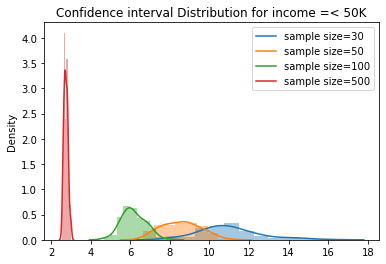

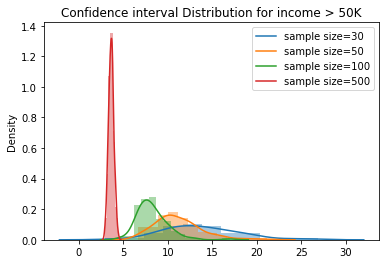

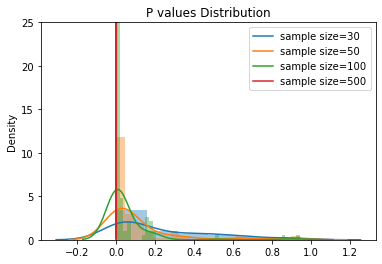

In [17]:
# fig = plt.figure(figsize=(25, 25))
# fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, size in enumerate(CI_category0):
    ax = fig.add_subplot(2, 4, i+1)
    sns.distplot(CI_category0[size],kde=True)
plt.legend( ['sample size=30','sample size=50','sample size=100','sample size=500'])
plt.title("Confidence interval Distribution for income =< 50K")  
plt.show()


for i, size in enumerate(CI_category1):
    ax = fig.add_subplot(2, 4, i+1)
    sns.distplot(CI_category1[size],kde=True)
plt.title("Confidence interval Distribution for income > 50K")
plt.legend( ['sample size=30','sample size=50','sample size=100','sample size=500'])   
plt.show()


for i, size in enumerate(pval):
    ax = fig.add_subplot(2, 4, i+1)
    sns.distplot(pval[size],kde=True)

plt.legend( ['sample size=30','sample size=50','sample size=100','sample size=500'])
plt.title("P values Distribution")

plt.ylim([0, 25])
plt.show()

In [18]:
# percentage of times that the mean from Q1 is within confidence interval for category 0
print('Percentage of times that the mean from Q1 is within confidence interval for category 0 is: {}%'.format(mean_in_CI_category_0/4))

# percentage of times that the mean from Q1 is within confidence interval for category 1
print('Percentage of times that the mean from Q1 is within confidence interval for category 1 is: {}%'.format(mean_in_CI_category_1/4))



Percentage of times that the mean from Q1 is within confidence interval for category 0 is: 95.25%
Percentage of times that the mean from Q1 is within confidence interval for category 1 is: 91.0%
